# Questions
* do a for loop and create new variables for everything in the for loop
* subplots
    * with for loop
    * without for loop
* setting the shape to a square for subplots and figures

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pyplot_themes as themes 

In [2]:
themes.theme_minimal()

In [3]:
df = pd.read_csv("../topic05/data/owid-covid-data.csv")

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [5]:
number_columns = []
for column in df.columns:
    # if the column is a int or float type
    if df[column].dtype in (int, float):
        number_columns.append(column)

In [6]:
df_numbers = df[number_columns]
df_numbers.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [7]:
# let's get the new columns together
new_columns = [col for col in df_numbers.columns if 'new' in col]
len(new_columns)

12

In [8]:
first_new_column = new_columns[0]
first_new_column

'new_cases'

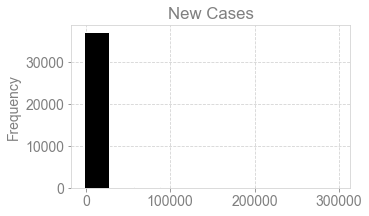

In [9]:
# what could be causing the error? 
# let's try subplotting with pandas plotting


df_numbers[first_new_column].plot(kind='hist', zorder=2, figsize=(5, 3))
plt.grid(zorder=0, linestyle='dashed')
plt.title(first_new_column.replace("_", " ").title())
plt.show()

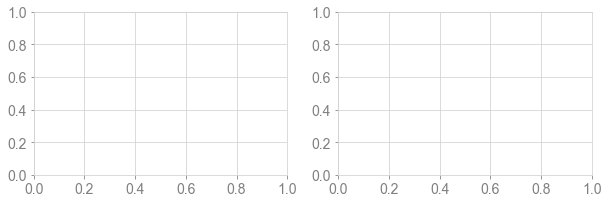

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

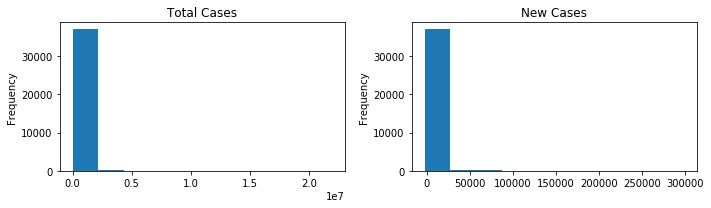

In [43]:
# let's make a subplot structure with 2 histograms

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

df_numbers[number_columns[0]].plot(kind='hist', zorder=2, ax=axs[0])
axs[0].set_title(number_columns[0].replace("_", " ").title())

df_numbers[number_columns[1]].plot(kind='hist', zorder=2, ax=axs[1])
axs[1].set_title(number_columns[1].replace("_", " ").title())


plt.tight_layout()
plt.show()

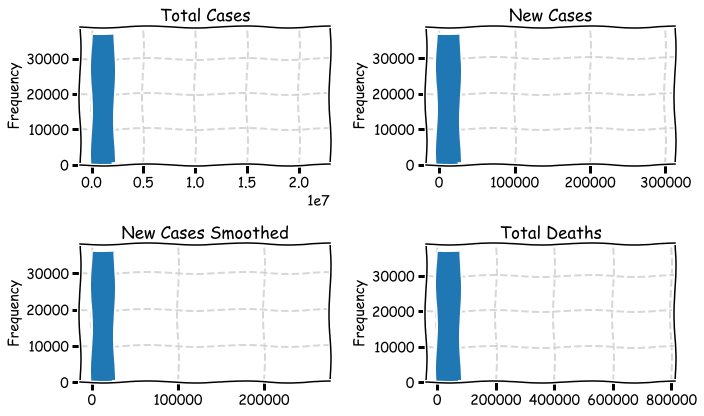

In [89]:
# let's do multidimensional subplots
# alpha is the opacity

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

for index, ax in enumerate(axs.flatten()):
    col_name = number_columns[index]
    df_numbers[col_name].plot(kind='hist', zorder=2, ax=ax, bins=10)
    ax.grid(linestyle='dashed', linewidth=2, alpha=0.5)
    # ax.set_aspect('equal', 'box')
    title = col_name.replace("_", " ").title()
    ax.set_title(title)

plt.tight_layout()
plt.xkcd()
plt.show()

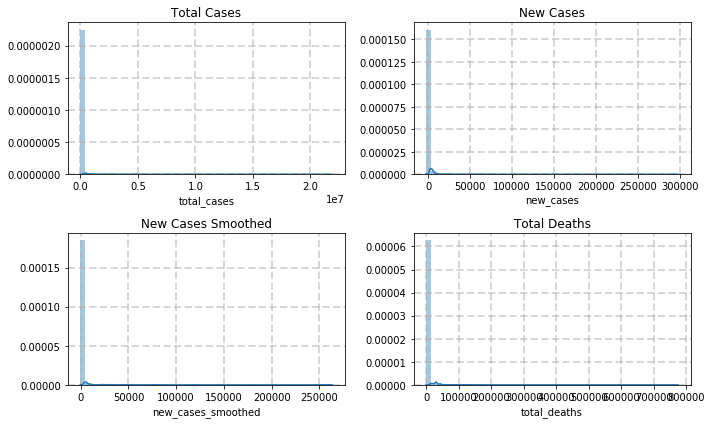

In [82]:
# let's do subplots with seaborn

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

for index, ax in enumerate(axs.flatten()):
    col_name = number_columns[index]
    sns.distplot(df[col_name], ax=ax, kde=True)
    ax.grid(linestyle='dashed', linewidth=2, alpha=0.5)
    title = col_name.replace("_", " ").title()
    ax.set_title(title)

plt.tight_layout()
plt.show()

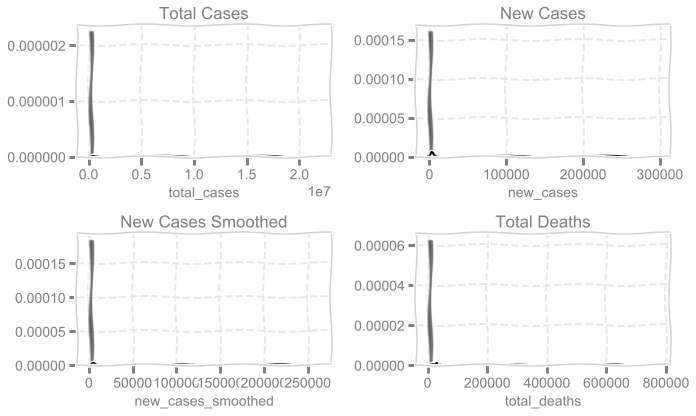

In [92]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

for index, ax in enumerate(axs.flatten()):
    col_name = number_columns[index]
    sns.distplot(df[col_name], ax=ax, kde=True)
    ax.grid(linestyle='dashed', linewidth=2, alpha=0.5)
    title = col_name.replace("_", " ").title()
    ax.set_title(title)

plt.tight_layout()
plt.show()

# What did we learn? 
* flattening a numpy array 
* matplotlib themes and xkcd
* all import statements should go together 
* plt.tight_layout() create spacing between subplots
* nifty styling 
* sns.distplot() instead of plt.hist()
* using if this in (tuple) instead of checking all conditions
* rotating xtick labels on subplots...did not learn this...it's hard
* slicing numpy arrays